In [147]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df_train=pd.read_csv('../data/train.csv')
df_store = pd.read_csv('../data/store.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_20644\3683741112.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('../data/train.csv')


In [149]:
#Merge the two datasets based on the store column on left
total_df = pd.merge(df_store,df_train, on='Store', how ='left')
print('Data has been successfully merged')

Data has been successfully merged


In [150]:
#handling missing value 
print(total_df.isnull().sum())

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


In [151]:
#filling the null value with the mean of column
total_df['CompetitionDistance'].fillna(total_df['CompetitionDistance'].mean(),inplace=True)

#fill them with minimum value for month and year
total_df['CompetitionOpenSinceMonth'].fillna(total_df['CompetitionOpenSinceMonth'].min(),inplace=True)
total_df['CompetitionOpenSinceYear'].fillna(total_df['CompetitionOpenSinceYear'].min(),inplace=True)

#fill them with 0 value
total_df['Promo2SinceWeek'].fillna(0,inplace=True)
total_df['Promo2SinceYear'].fillna(0,inplace=True)
total_df['PromoInterval'].fillna(0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20644\3522456861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_df['CompetitionDistance'].fillna(total_df['CompetitionDistance'].mean(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20644\3522456861.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [152]:
print(total_df.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64


In [153]:
lis = ['DayOfWeek' , 'StateHoliday' , 'SchoolHoliday']
for i in lis:
    print(i)
    print(total_df[i].unique())
    print('--------------------')

DayOfWeek
[5 4 3 2 1 7 6]
--------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
--------------------
SchoolHoliday
[1 0]
--------------------


In [154]:
#change data types object to int
total_df.loc[total_df['StateHoliday']== '0', 'StateHoliday'] = 0
total_df.loc[total_df['StateHoliday']== 'a', 'StateHoliday'] = 1
total_df.loc[total_df['StateHoliday']== 'b', 'StateHoliday'] = 2
total_df.loc[total_df['StateHoliday']== 'c', 'StateHoliday'] = 3

#store the value with same column name i.e stateHoliday with function astype 
total_df['StateHoliday'] = total_df['StateHoliday'].astype(int, copy=False)

In [155]:
#change data types object to int
total_df.loc[total_df['Assortment']== 'a', 'Assortment'] = 0
total_df.loc[total_df['Assortment']== 'b', 'Assortment'] = 1
total_df.loc[total_df['Assortment']== 'c', 'Assortment'] = 2

#store the value with same column name i.e stateHoliday with function astype 
total_df['Assortment'] = total_df['Assortment'].astype(int, copy=False)

In [156]:
#change data types object to int
total_df.loc[total_df['StoreType']== 'a', 'StoreType'] = 0
total_df.loc[total_df['StoreType']== 'b', 'StoreType'] = 1
total_df.loc[total_df['StoreType']== 'c', 'StoreType'] = 2
total_df.loc[total_df['StoreType']== 'd', 'StoreType'] = 3

#store the value with same column name i.e stateHoliday with function astype 
total_df['StoreType'] = total_df['StoreType'].astype(int, copy=False)

In [157]:
total_df['CompetitionDistance'] = total_df['CompetitionDistance'].astype(int)
total_df['Promo2SinceWeek'] = total_df['Promo2SinceWeek'].astype(int)

#code for to change float to integer
total_df['CompetitionOpenSinceYear'] = total_df['CompetitionOpenSinceYear'].astype(int)
total_df['Promo2SinceYear'] = total_df['Promo2SinceYear'].astype(int)

#code for change object into date format
total_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(total_df['Date']).month

#code for changing format of date from object to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format = '%Y-%m-%d')

In [158]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  int32         
 2   Assortment                 1017209 non-null  int32         
 3   CompetitionDistance        1017209 non-null  int32         
 4   CompetitionOpenSinceMonth  1017209 non-null  int32         
 5   CompetitionOpenSinceYear   1017209 non-null  int32         
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  int32         
 8   Promo2SinceYear            1017209 non-null  int32         
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

c:\Users\hp\anaconda\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\anaconda\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


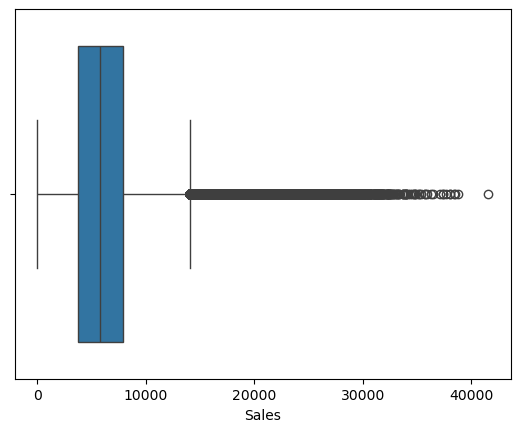

In [159]:
#Handling Outliers & Outlier treatments
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable
sns.boxplot(x='Sales', data=total_df)
# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'sales' variable

from scipy.stats.mstats import winsorize
total_df['Sales'] = winsorize(total_df[ 'Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the "Sales' variable
q1 = total_df['Sales'].quantile (0.25)
q3 = total_df['Sales'].quantile (0.75)
iqr = q3 - q1
total_df = total_df[(total_df['Sales'] >=q1 - 1.5*iqr) & (total_df[ 'Sales'] <= q3 + 1.5*iqr)]

In [160]:
print(total_df.dtypes)

Store                                 int64
StoreType                             int32
Assortment                            int32
CompetitionDistance                   int32
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int32
SchoolHoliday                         int64
dtype: object


In [161]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding
total_df['StateHoliday'] = total_df['StateHoliday'].astype(str)  # Convert to string if not already
total_df_one_hot = pd.get_dummies(total_df, columns=['StateHoliday'], prefix='StateHoliday')

# Label encoding (for the original column, create a copy to avoid conflicts)
le = LabelEncoder()
total_df['StateHoliday'] = le.fit_transform(total_df['StateHoliday'])
# total_df['StateHoliday_1'] = le.fit_transform(total_df['StateHoliday_1'])
# total_df['StateHoliday_2'] = le.fit_transform(total_df['StateHoliday_2'])
# total_df['StateHoliday_3'] = le.fit_transform(total_df['StateHoliday_3'])




In [162]:
print(total_df.dtypes)

Store                                 int64
StoreType                             int32
Assortment                            int32
CompetitionDistance                   int32
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int32
SchoolHoliday                         int64
dtype: object


In [32]:
#Multicollineartiy

In [168]:
# Select only numeric columns
numeric_columns = total_df.select_dtypes(include=[float, int])

In [165]:
#import the necessary library for calculating variance
1 # Import the necessary library for calculating Variance Inflation Factor (VIF).
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define a function named 'cale_vif' that calculates the VIF for each column in the input DataFrame 'X'.
def calc_vif(features):
   
# Calculating VIF
   vif = pd.DataFrame()
   vif[ "features"] =features
   vif["VIF"] = [variance_inflation_factor(numeric_columns[features].values, i) for i in range(len(features))]
   return vif.sort_values(by=["VIF"]).reset_index(drop=True)
#calc_vif(total_df[[i for i in total_df.describe().columns if i  not in ['Sales']]])

In [166]:
features = numeric_columns.drop(columns=['Sales']).columns.to_list()
vif = calc_vif(features)
vif

,features,VIF
0,StateHoliday,1.310224e+00
1,SchoolHoliday,1.337780e+00
2,CompetitionDistance,1.617322e+00
3,StoreType,1.964772e+00
4,Promo,1.991940e+00
5,Assortment,2.044173e+00
6,Promo2SinceWeek,3.981859e+00
7,Store,4.010019e+00
8,CompetitionOpenSinceMonth,4.144147e+00
9,Customers,5.267059e+00


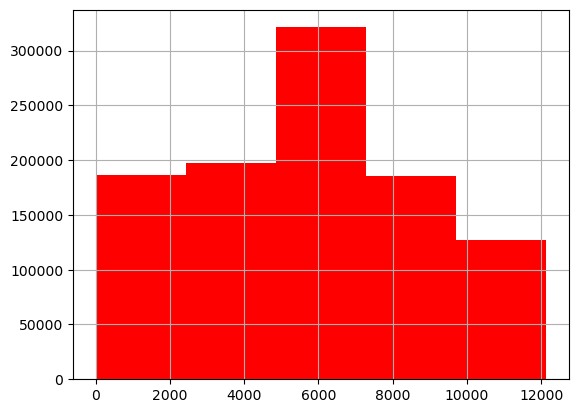

In [171]:
#create a histogram of 'Sales' column from DataFrame 'total_df'
pd.Series(total_df['Sales'],).hist(bins=5, color='red')
plt.show()

In [172]:
total_df[(total_df.Open == 0) & (total_df.Sales == 0)].count()[0]

C:\Users\hp\AppData\Local\Temp\ipykernel_20644\4069440949.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_df[(total_df.Open == 0) & (total_df.Sales == 0)].count()[0]


172817

In [173]:
#Filtering and dropping rows where both 'Open' and 'Sales' are 0
new_df = total_df.drop(total_df[(total_df.Open == 0) & (total_df.Sales == 0)].index)

In [174]:
new_df.shape

(844392, 18)

In [175]:
new_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,0,1270,7,2008,0,0,0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,2,0,1270,7,2008,0,0,0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,2,0,1270,7,2008,0,0,0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,2,0,1270,7,2008,0,0,0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,2,0,1270,7,2008,0,0,0,0,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,3,2,5350,1,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1
1017204,1115,3,2,5350,1,1900,1,22,2012,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,3,2,5350,1,1900,1,22,2012,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,3,2,5350,1,1900,1,22,2012,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1


In [176]:
#perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [177]:
new_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,2,0,1270,7,2008,0,0,0,5,...,5263,555,1,1,0,1,True,False,False,False
1,1,2,0,1270,7,2008,0,0,0,4,...,5020,546,1,1,0,1,True,False,False,False
2,1,2,0,1270,7,2008,0,0,0,3,...,4782,523,1,1,0,1,True,False,False,False
3,1,2,0,1270,7,2008,0,0,0,2,...,5011,560,1,1,0,1,True,False,False,False
4,1,2,0,1270,7,2008,0,0,0,1,...,6102,612,1,1,0,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,3,2,5350,1,1900,1,22,2012,1,...,6905,471,1,1,0,1,False,False,False,True
1017204,1115,3,2,5350,1,1900,1,22,2012,6,...,4771,339,1,0,0,1,False,False,False,True
1017205,1115,3,2,5350,1,1900,1,22,2012,5,...,4540,326,1,0,0,1,False,False,False,True
1017206,1115,3,2,5350,1,1900,1,22,2012,4,...,4297,300,1,0,0,1,False,False,False,True


In [178]:
new_df.to_csv('cleandata.csv', index=False)